# Spatiotemporal Energy Model
Acelson & Bergen 1984

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.signal as signal

## Spatial Filters: 1D

Text(0.5, 1.0, '1D Spatial Filter Quadrature Pairs')

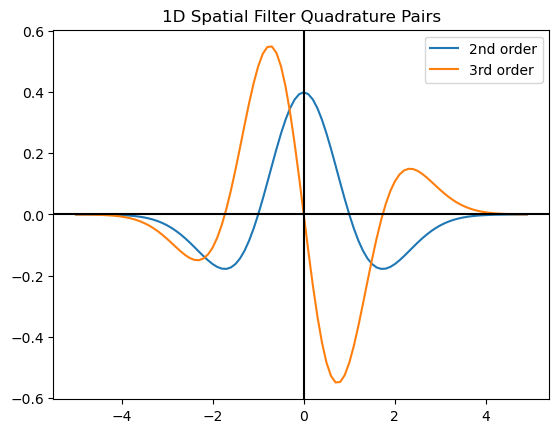

In [30]:
def spatial_filter_1d(x, order=2):
    if order == 2:
        #second derivative of gaussian
        response = -(np.exp(-(x**2/2))*(-1+x)*(1+x))/np.sqrt(2*np.pi)
    elif order == 3:
        #third derivative of gaussian
        response = (np.exp(-(x**2/2))*x*(-3+x**2))/np.sqrt(2*np.pi)
    else:
        print('Must be 2nd or 3rd order!')
        return
    return response
    
space = np.arange(-5,5,0.1)
response_1 = spatial_filter_1d(space, order=2)
response_2 = spatial_filter_1d(space, order=3)
plt.plot(space,response_1, label='2nd order')
plt.plot(space,response_2, label='3rd order')
plt.axhline(0,c='k')
plt.axvline(0,c='k')
plt.legend()
plt.title("1D Spatial Filter Quadrature Pairs")

## Spatial Filters: 2D
Todo: Specify Oriented Filter Equations

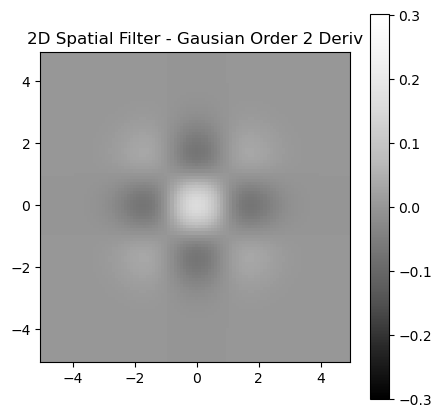

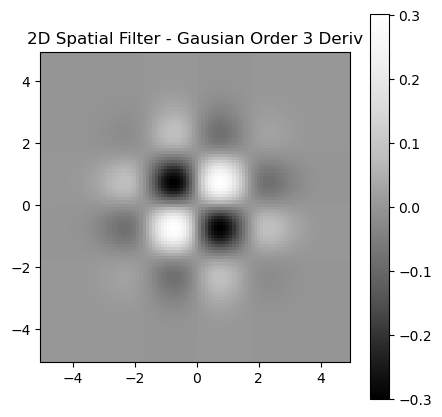

In [31]:
 #gaussian Spatial Filter per Adelson & Bergen, 2nd and 3rd derivatives of Gaussian
def spatial_filter_2d(x1, x2, order=2, oriented=False):
    if oriented:
        print('Oriented Not Yet Implmented')
        return
    else:
        if order == 2:
            #second derivative of gaussian
            x1_response = (np.exp(-(x1**2/2))*(-1+x1)*(1+x1))/np.sqrt(2*np.pi)
            x2_response = (np.exp(-(x2**2/2))*(-1+x2)*(1+x2))/np.sqrt(2*np.pi)
        elif order == 3:
            #third derivative of gaussian
            x1_response = -(np.exp(-(x1**2/2))*x1*(-3+x1**2))/np.sqrt(2*np.pi)
            x2_response = -(np.exp(-(x2**2/2))*x2*(-3+x2**2))/np.sqrt(2*np.pi)
        else:
            print('Must be 2nd or 3rd order!')
            return
            
    response = np.outer(x1_response, x2_response)
    return(response)

space_x = np.arange(-5,5,0.1)
space_y = np.arange(-5,5,0.1)
response_1 = spatial_filter_2d(space_x, space_y, order=2)
response_2 = spatial_filter_2d(space_x, space_y, order=3)
#cmax=np.max((response_1,response_2))
#cmin=np.min((response_1,response_2))
rmax = np.max(np.abs((response_1,response_2)))
rmin = -1*rmax

plt.figure(figsize=(5,5))
plt.pcolormesh(space_x, space_y, response_1, shading='auto', vmin=rmin, vmax=rmax,cmap='Greys_r')
plt.gca().set_aspect('equal')
plt.colorbar()
plt.title("2D Spatial Filter - Gausian Order 2 Deriv")
plt.show()

plt.figure(figsize=(5,5))
plt.pcolormesh(space_x, space_y, response_2, shading='auto', vmin=rmin, vmax=rmax,cmap='Greys_r')
plt.gca().set_aspect('equal')
plt.colorbar()
plt.title("2D Spatial Filter - Gausian Order 3 Deriv")
plt.show()

## Temporal Filters

Text(0.5, 1.0, 'Temporal Filter Quadrature Pairs')

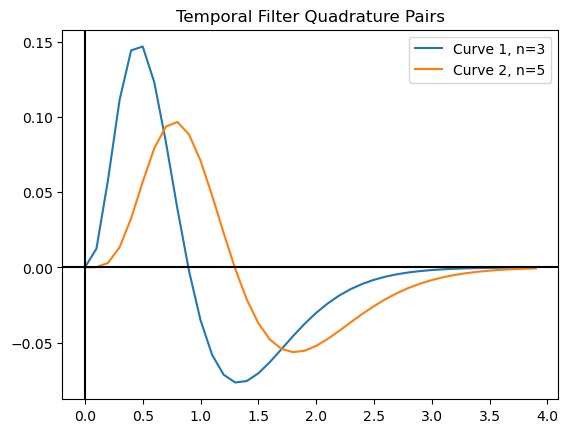

In [32]:
#Temporal Filter per Adelson & Bergen (eq 1)
def temporal_filter(t, n=3, k=1):
    a = (k*t)**n
    b = np.exp(-k*t)
    c = (1/np.math.factorial(n))-((k*t)**2)/(np.math.factorial(n+2))
    return(a*b*c)

times = np.arange(0,4,0.1)
response_1 = temporal_filter(times, n=3, k=5)
response_2 = temporal_filter(times, n=5, k=5)
plt.plot(times,response_1, label='Curve 1, n=3')
plt.plot(times,response_2, label='Curve 2, n=5')
plt.axhline(0,c='k')
plt.axvline(0,c='k')
plt.legend()
plt.title("Temporal Filter Quadrature Pairs")

## Separable Spatiotemporal Filters

Note, the designation A,A',B,B' is kind of confusing with regards to figure 10 in the paper. Here, we use the designation from Figure 18b to define the 4 spatiotemporal filters. The ordering in Figure 10c is B,B',A',A that correspond to the 4 filters here. Also note that the last 2 filters are inverted here as compare to Figure 10.

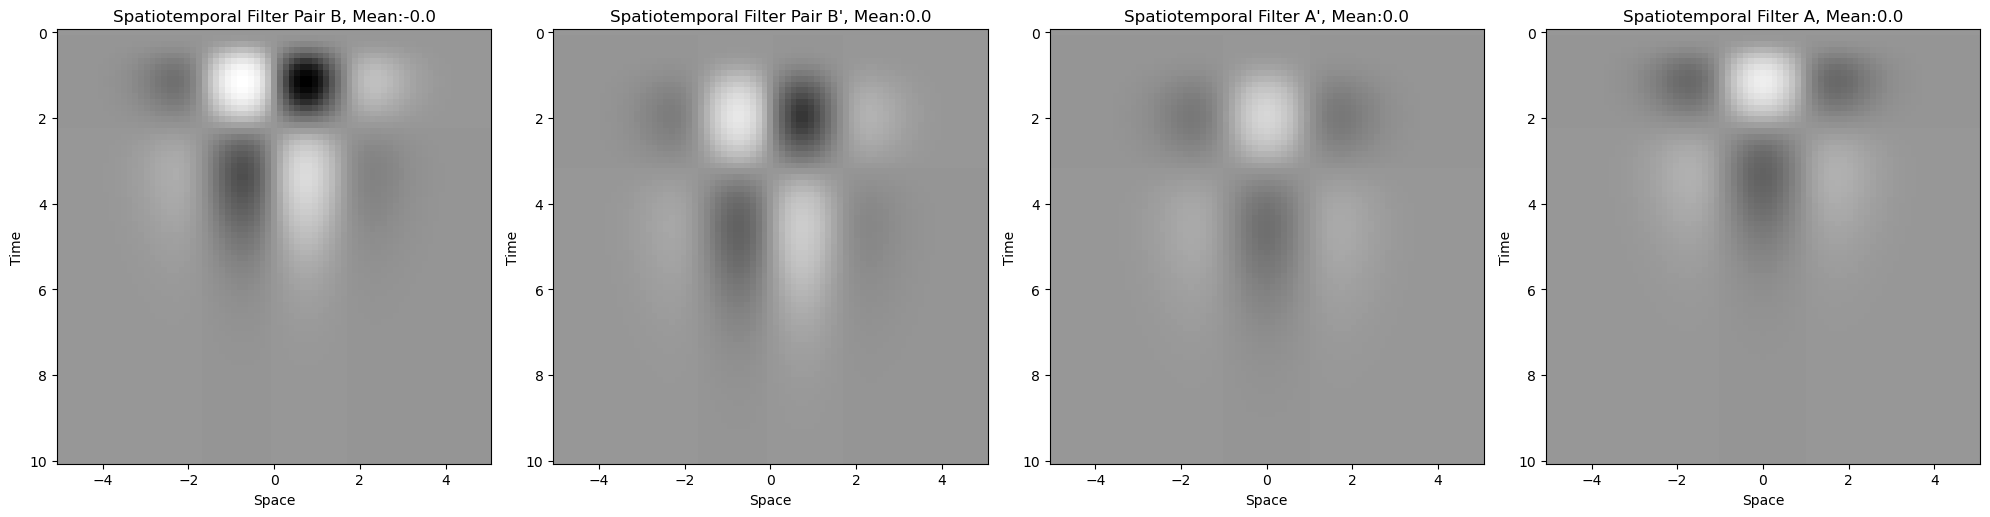

In [95]:
def spatiotemporal_filter(x,t, temporal_n=3, temporal_k=1, spatial_order=2):
    #spatial component
    if spatial_order == 2:
        #second derivative of gaussian
        spatial_response = -(np.exp(-(x**2/2))*(-1+x)*(1+x))/np.sqrt(2*np.pi)
    elif spatial_order == 3:
        #third derivative of gaussian
        spatial_response = (np.exp(-(x**2/2))*x*(-3+x**2))/np.sqrt(2*np.pi)
    else:
        print('Must be 2nd or 3rd order!')
    
    #temporal component
    a = (temporal_k*t)**temporal_n
    b = np.exp(-temporal_k*t)
    c = (1/np.math.factorial(temporal_n))-((temporal_k*t)**2)/(np.math.factorial(temporal_n+2))
    temporal_response = a*b*c

    #combine two
    response = spatial_response * temporal_response
    
    return response

#setup space and time progression
space = np.linspace(-5,5,num=75)
times = np.linspace(0,10,num=75)
aspect_ratio = np.abs(np.max(space)-np.min(space))/np.abs(np.max(times)-np.min(times))
s,t = np.meshgrid(space,times)

#value of k
my_k = 2

#create responses
st_response_a = spatiotemporal_filter(s,t, temporal_n=3, temporal_k=my_k, spatial_order=2).T
st_response_apr = spatiotemporal_filter(s,t, temporal_n=5, temporal_k=my_k, spatial_order=2).T
st_response_b = spatiotemporal_filter(s,t, temporal_n=3, temporal_k=my_k, spatial_order=3).T
st_response_bpr = spatiotemporal_filter(s,t, temporal_n=5, temporal_k=my_k, spatial_order=3).T
#rmin = np.min((st_response_a, st_response_b, st_response_apr, st_response_bpr))
#rmax = np.max((st_response_a, st_response_b, st_response_apr, st_response_bpr))
rmax = np.max(np.abs((st_response_a, st_response_b, st_response_apr, st_response_bpr)))
rmin = -1*rmax
norm = mpl.colors.Normalize(vmin=rmin, vmax=rmax)

plt.figure(figsize=(20,7))
#plot
plt.subplot(1,4,4, aspect=aspect_ratio)
plt.pcolormesh(space,times,st_response_a.T, norm=norm, shading='auto',cmap='Greys_r')
#plt.pcolormesh(times,space,st_response_1a, norm=norm, shading='auto')
plt.gca().invert_yaxis()
plt.ylabel('Time')
plt.xlabel('Space')
#plt.colorbar()
plt.title(f"Spatiotemporal Filter A, Mean:{np.mean(st_response_a):0.1f}")

plt.subplot(1,4,3, aspect=aspect_ratio)
plt.pcolormesh(space,times,st_response_apr.T, norm=norm, shading='auto',cmap='Greys_r')
#plt.pcolormesh(times,space,st_response_1b, norm=norm, shading='auto')
plt.gca().invert_yaxis()
plt.ylabel('Time')
plt.xlabel('Space')
#plt.colorbar()
plt.title(f"Spatiotemporal Filter A', Mean:{np.mean(st_response_apr):0.1f}")

plt.subplot(1,4,1, aspect=aspect_ratio)
#plt.pcolormesh(times,space,st_response_2b, norm=norm, shading='auto')
plt.pcolormesh(space,times,st_response_b.T, norm=norm, shading='auto',cmap='Greys_r')
plt.gca().invert_yaxis()
plt.xlabel('Space')
plt.ylabel('Time')
#plt.colorbar()
plt.title(f"Spatiotemporal Filter Pair B, Mean:{np.mean(st_response_b):0.1f}")
plt.tight_layout()

plt.subplot(1,4,2, aspect=aspect_ratio)
plt.pcolormesh(space,times,st_response_bpr.T, norm=norm, shading='auto',cmap='Greys_r')
#plt.pcolormesh(times,space,st_response_2a, norm=norm, shading='auto')
plt.gca().invert_yaxis()
plt.ylabel('Time')
plt.xlabel('Space')
#plt.colorbar()
plt.title(f"Spatiotemporal Filter Pair B', Mean:{np.mean(st_response_bpr):0.1f}")

plt.tight_layout()
plt.show()


**Note**:
What could these filters be sensitive to? Certainly a flashing stimulus, but also what kind of motion? For the top filter, something that appears dark in the middle and then moves at the speed such that it ends up at 2 or -2 at t=1.5 seconds. The top filter can detect this, but has ambiguity about motion direction. The bottom filter (spatial quaderature pair) has spatial asymmetry such that this ambiguity is broken, and with the two filters responses combined, both the speed and direction can be recovered.

## Combining Spatiotemporal Separable Filters to create Spatiotemporally Oriented Filters

The next step in the spatiotemporal energy model is to combine these separable spatiotemporal filters to create oriented linear responses.

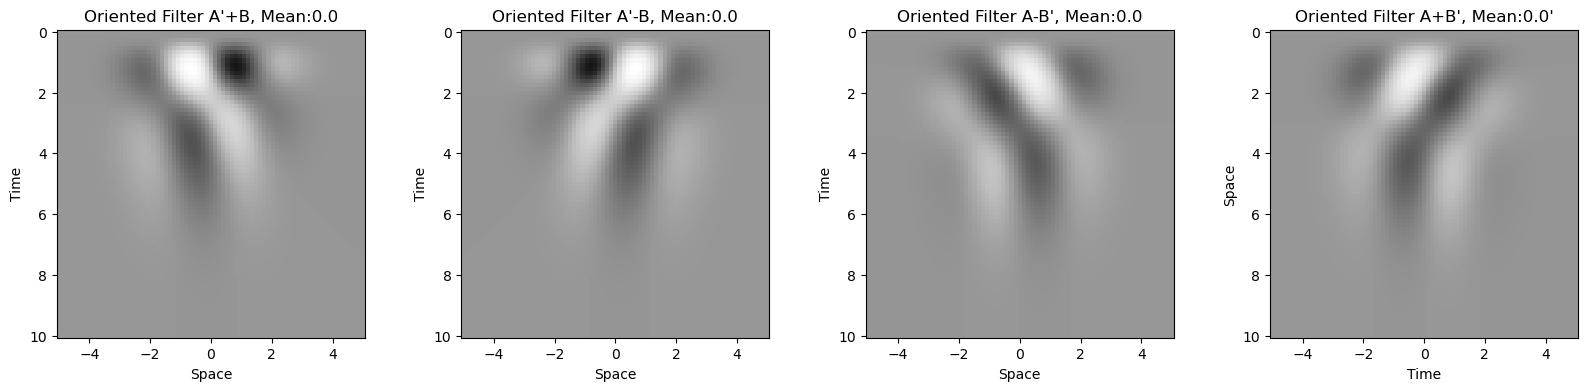

In [136]:
#i think there was a bug here
# a_plus_bp = st_response_a + st_response_bpr
# b_minus_ap = st_response_b - st_response_apr
# bp_minus_a = st_response_bpr - st_response_a
# ap_plus_b = st_response_apr + st_response_b

#new version corresponding to A&B (from figure 18b)
a_minus_bp = st_response_a - st_response_bpr
ap_plus_b = st_response_apr + st_response_b
a_plus_bp = st_response_a + st_response_bpr
ap_minus_b = st_response_apr - st_response_b

#rmin = np.min((a_plus_bp, b_minus_ap, bp_minus_a, ap_plus_b))
#rmax = np.max((a_plus_bp, b_minus_ap, bp_minus_a, ap_plus_b))
rmax = np.max(np.abs((a_minus_bp, ap_plus_b, a_plus_bp, ap_minus_b)))
rmin = -1*rmax
norm = mpl.colors.Normalize(vmin=rmin, vmax=rmax)

plt.figure(figsize=(20,4))

#plot
plt.subplot(1,4,3, aspect=aspect_ratio)
plt.pcolormesh(space,times,a_minus_bp.T, norm=norm, shading='auto',cmap='Greys_r')
plt.gca().invert_yaxis()
plt.ylabel('Time')
plt.xlabel('Space')
#plt.colorbar()
plt.title(f"Oriented Filter A-B', Mean:{np.mean(a_minus_bp):0.1f}")

plt.subplot(1,4,1, aspect=aspect_ratio)
plt.pcolormesh(space,times,ap_plus_b.T, norm=norm, shading='auto',cmap='Greys_r')
plt.gca().invert_yaxis()
plt.ylabel('Time')
plt.xlabel('Space')
#plt.colorbar()
plt.title(f"Oriented Filter A'+B, Mean:{np.mean(ap_plus_b):0.1f}")


plt.subplot(1,4,4, aspect=aspect_ratio)
plt.pcolormesh(space,times,a_plus_bp.T, norm=norm, shading='auto',cmap='Greys_r')
plt.gca().invert_yaxis()
plt.ylabel('Space')
plt.xlabel('Time')
#plt.colorbar()
plt.title(f"Oriented Filter A+B', Mean:{np.mean(a_plus_bp):0.1f}'")

plt.subplot(1,4,2, aspect=aspect_ratio)
plt.pcolormesh(space,times,ap_minus_b.T, norm=norm, shading='auto',cmap='Greys_r')
plt.gca().invert_yaxis()
plt.ylabel('Time')
plt.xlabel('Space')
#plt.colorbar()
plt.title(f"Oriented Filter A'-B, Mean:{np.mean(ap_minus_b):0.1f}")

plt.show()

note again the direction of the first and last filter is reversed that in figure 10. We are going by figure 18.

### Spatiotemporal Frequency Space

How do these filters appear in spatiotmeporal energy space, figure 11.

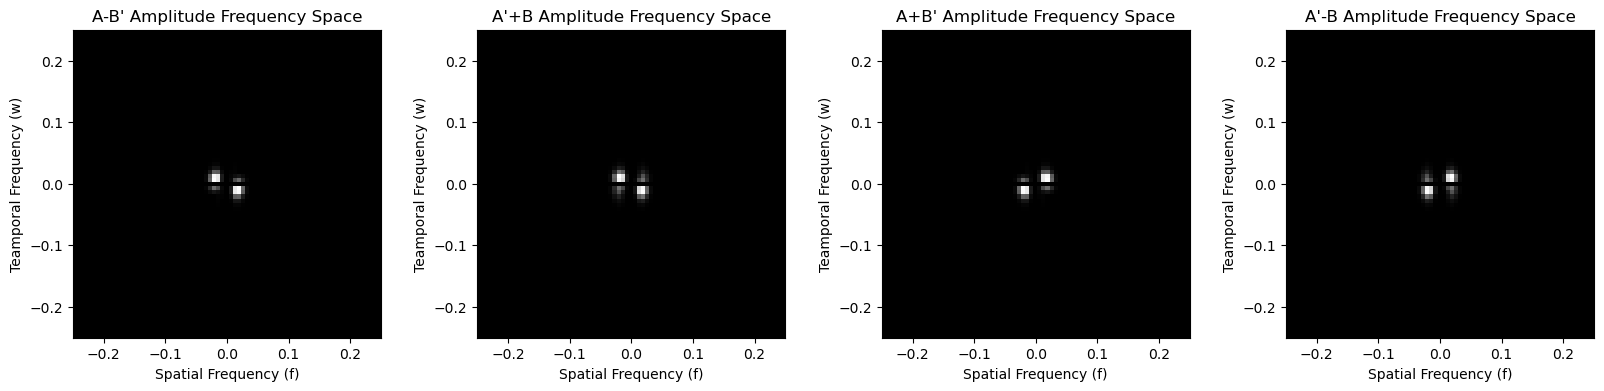

In [148]:
a_minus_bp_pow = np.abs(np.fft.fftshift(np.fft.fft2(a_minus_bp.T)))**2
ap_plus_b_pow = np.abs(np.fft.fftshift(np.fft.fft2(ap_plus_b.T)))**2
a_plus_bp_pow = np.abs(np.fft.fftshift(np.fft.fft2(a_plus_bp.T)))**2
ap_minus_b_pow = np.abs(np.fft.fftshift(np.fft.fft2(ap_minus_b.T)))**2

fqspace = np.fft.fftshift(np.fft.fftfreq(a_minus_bp.T.shape[0],d=2))
fqtime = np.fft.fftshift(np.fft.fftfreq(a_minus_bp.T.shape[1],d=2))

plt.figure(figsize=(20,4))

plt.subplot(1,4,1, aspect=aspect_ratio)
plt.pcolor(fqspace, fqtime, a_minus_bp_pow, shading='auto',cmap='Greys_r')
plt.xlabel('Spatial Frequency (f)')
plt.ylabel('Teamporal Frequency (w)')
#plt.colorbar()
plt.title(f"A-B' Amplitude Frequency Space")

plt.subplot(1,4,2, aspect=aspect_ratio)
plt.pcolor(fqspace,fqtime,ap_plus_b_pow, shading='auto',cmap='Greys_r')
plt.xlabel('Spatial Frequency (f)')
plt.ylabel('Teamporal Frequency (w)')
#plt.colorbar()
plt.title(f"A'+B Amplitude Frequency Space")

plt.subplot(1,4,3, aspect=aspect_ratio)
plt.pcolor(fqspace,fqtime,a_plus_bp_pow,shading='auto',cmap='Greys_r')
plt.xlabel('Spatial Frequency (f)')
plt.ylabel('Teamporal Frequency (w)')
#plt.colorbar()
plt.title(f"A+B' Amplitude Frequency Space")

plt.subplot(1,4,4, aspect=aspect_ratio)
plt.pcolor(fqspace,fqtime,ap_minus_b_pow,shading='auto',cmap='Greys_r')
plt.xlabel('Spatial Frequency (f)')
plt.ylabel('Teamporal Frequency (w)')
plt.title(f"A'-B Amplitude Frequency Space")

plt.show()

## Oriented Energy Filters
We now square each of these filters, and sum to create two oriented Energy Filters

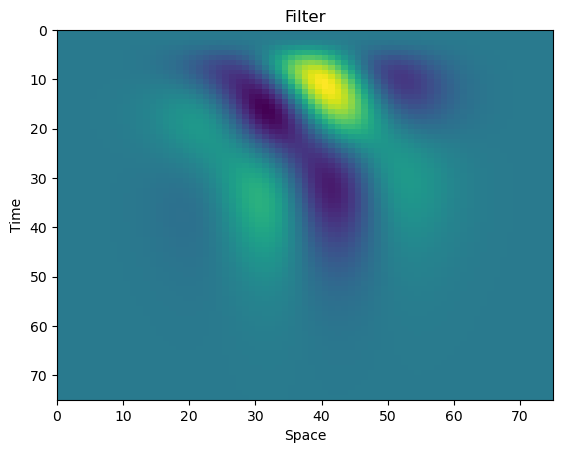

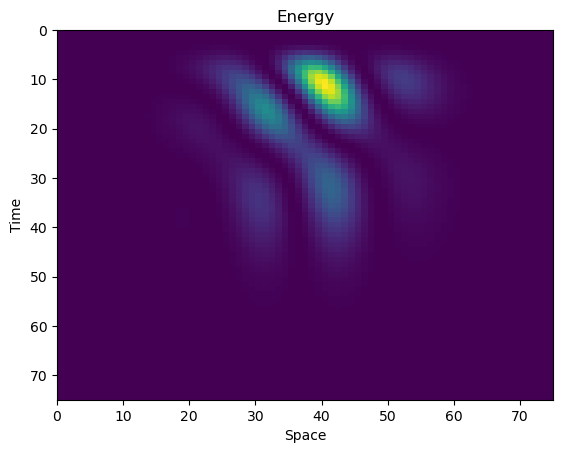

In [97]:
#filter
plt.pcolormesh((a_minus_bp).T)
plt.gca().invert_yaxis()
plt.ylabel('Time')
plt.xlabel('Space')
plt.title('Filter')
plt.show()
#energy
plt.pcolormesh((a_minus_bp**2).T)
plt.ylabel('Time')
plt.xlabel('Space')
plt.gca().invert_yaxis()
plt.title('Energy')
plt.show()


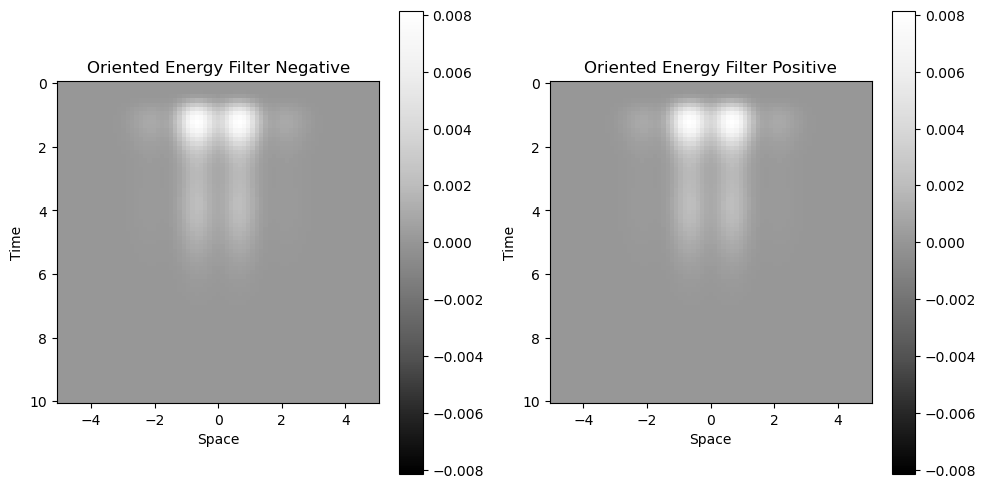

In [98]:
oriented_energy_n = (a_minus_bp**2) + (ap_plus_b**2)
oriented_energy_p = (a_plus_bp**2) + (ap_minus_b**2)

a_plus_bp = st_response_a + st_response_bpr
b_minus_ap = st_response_b - st_response_apr
bp_minus_a = st_response_bpr - st_response_a
ap_plus_b = st_response_apr + st_response_b

#rmin = np.min((oriented_energy_n, oriented_energy_p))
#rmax = np.max((oriented_energy_n, oriented_energy_p))
rmax = np.max(np.abs((oriented_energy_n, oriented_energy_p)))
rmin = -1*rmax
norm = mpl.colors.Normalize(vmin=rmin, vmax=rmax)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1, aspect=aspect_ratio)
plt.pcolormesh(space,times,oriented_energy_n.T, norm=norm, shading='auto',cmap='Greys_r')
plt.gca().invert_yaxis()
plt.xlabel('Space')
plt.ylabel('Time')
plt.colorbar()
plt.title("Oriented Energy Filter Negative")

plt.subplot(1,2,2, aspect=aspect_ratio)
plt.pcolormesh(space,times,oriented_energy_p.T, norm=norm, shading='auto',cmap='Greys_r')
plt.gca().invert_yaxis()
plt.ylabel('Time')
plt.xlabel('Space')
plt.colorbar()
plt.title("Oriented Energy Filter Positive")

plt.tight_layout()
plt.show()


**Note**: These don't look oriented - and they look identical... Why is that?

## Opponent Energy Filters
The final step is the combine the two oriented Energy Filters to create the opponent energy filter

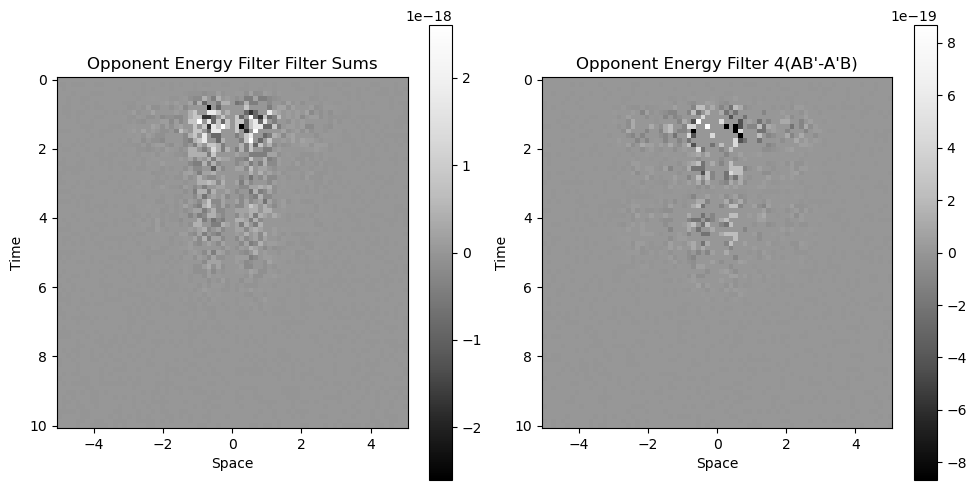

In [99]:
opponent_energy = oriented_energy_p - oriented_energy_n
opponent_energy_equiv = 4*((st_response_a*st_response_bpr) - (st_response_apr*st_response_b))


plt.figure(figsize=(10,5))
plt.subplot(1,2,1,aspect=aspect_ratio)
plt.pcolormesh(space,times,opponent_energy.T, shading='auto',cmap='Greys_r')
plt.gca().invert_yaxis()
plt.xlabel('Space')
plt.ylabel('Time')
plt.colorbar()
plt.title("Opponent Energy Filter Filter Sums")
plt.tight_layout()

plt.subplot(1,2,2,aspect=aspect_ratio)
plt.pcolormesh(space,times,opponent_energy_equiv.T, shading='auto',cmap='Greys_r')
plt.gca().invert_yaxis()
plt.xlabel('Space')
plt.ylabel('Time')
plt.colorbar()
plt.title("Opponent Energy Filter 4(AB'-A'B)")
plt.tight_layout()

plt.show()

**Note:** Note the small values in the colorbars. These are essentially identical up to numerical error (1e-19). So the algebra is correct but seems something about the separable responses (A,A',B,B') may be off.. 

## Applying a Stimulus
As in the paper (figure 15) apply a moving target stim to these filters to see what the output is

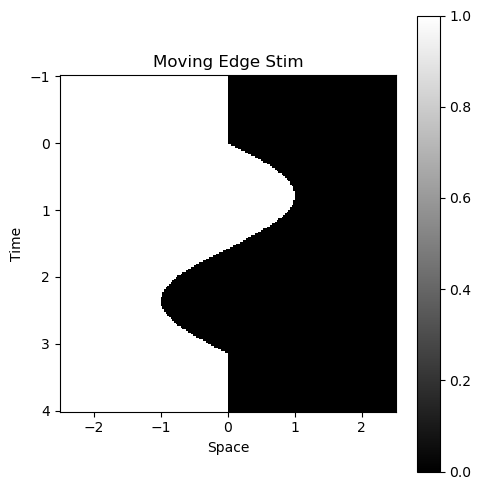

In [100]:
stim_size = 200
#space_stim = np.arange(-2.5,2.5,0.005)
#time_stim = np.arange(0,5,0.005)
space_stim = np.linspace(-2.5,2.5,num=stim_size)
time_stim = np.linspace(-1,4,num=stim_size)
aspect_ratio_stim = np.abs(np.max(space_stim)-np.min(space_stim))/np.abs(np.max(time_stim)-np.min(time_stim))

def edge_vector(space_vec, edge_location=0):
    edge_vector = np.where(space_vec < edge_location,1,0)
    return(edge_vector)

edge_locs = [np.sin(t/0.5) if t>0 and t<np.pi else 0 for t in time_stim]

stim = np.array([edge_vector(space_stim,edge_location=e) for e in edge_locs]).T

plt.figure(figsize=(5,5))
plt.pcolormesh(space_stim, time_stim, stim.T,cmap='gray',shading='auto')
plt.gca().invert_yaxis()
plt.gca().set_aspect(aspect_ratio_stim)
plt.xlabel('Space')
plt.ylabel('Time')
plt.colorbar()
plt.title("Moving Edge Stim")
plt.tight_layout()

In [101]:
stim.shape, a_minus_bp.shape

((200, 200), (75, 75))

### Oriented Filters

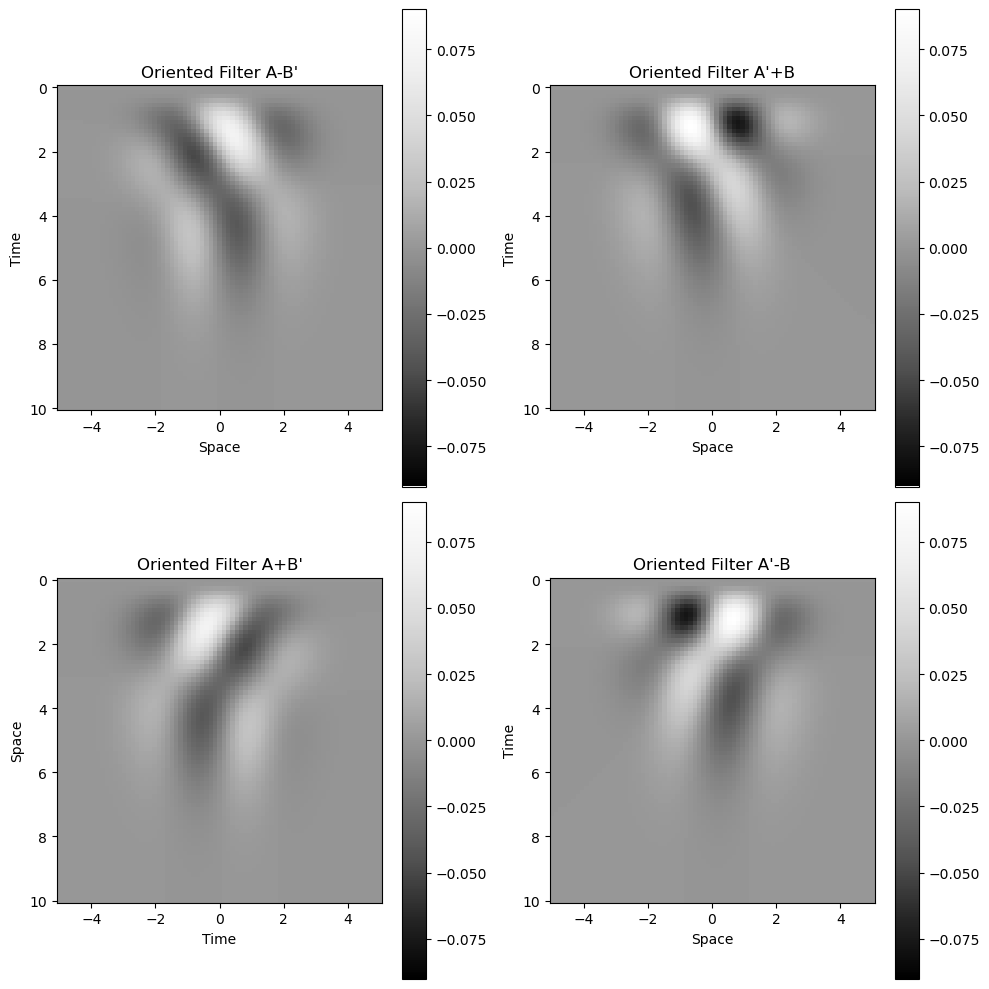

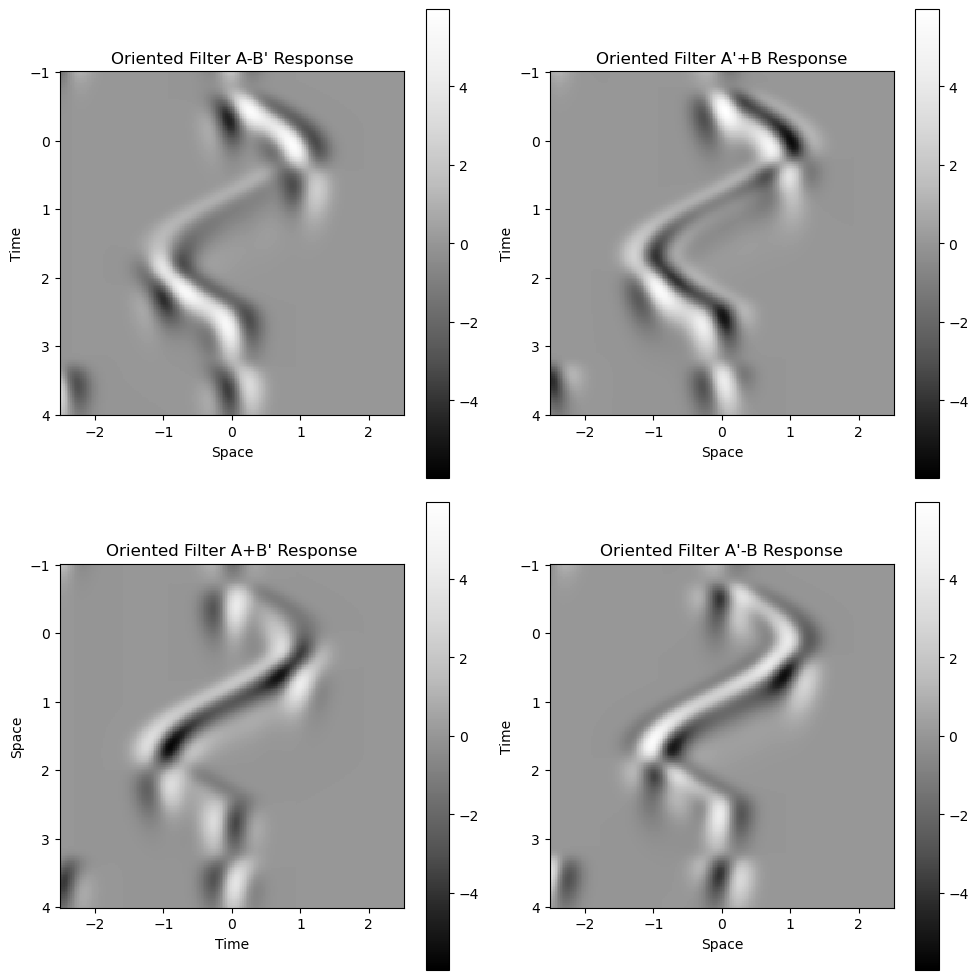

In [102]:
a_minus_bp_resp = signal.convolve2d(stim, a_minus_bp, mode='same')
ap_plus_b_resp = signal.convolve2d(stim, ap_plus_b, mode='same')
a_plus_bp_resp = signal.convolve2d(stim, a_plus_bp, mode='same')
ap_minus_b_resp = signal.convolve2d(stim, ap_minus_b, mode='same')

#rmin = np.min((a_minus_bp, ap_plus_b, a_plus_bp, ap_minus_b))
#rmax = np.max((a_minus_bp, ap_plus_b, a_plus_bp, ap_minus_b))
rmax = np.max(np.abs((a_minus_bp, ap_plus_b, a_plus_bp, ap_minus_b)))
rmin = -1*rmax
norm = mpl.colors.Normalize(vmin=rmin, vmax=rmax)

#plot filters

plt.figure(figsize=(10,10))
plt.subplot(2,2,1,aspect=aspect_ratio)
plt.pcolormesh(space,times,a_minus_bp.T, norm=norm, cmap='Greys_r',shading='auto')
plt.gca().invert_yaxis()
plt.ylabel('Time')
plt.xlabel('Space')
plt.colorbar()
plt.title("Oriented Filter A-B'")

plt.subplot(2,2,2,aspect=aspect_ratio)
plt.pcolormesh(space,times,ap_plus_b.T, norm=norm, cmap='Greys_r',shading='auto')
plt.gca().invert_yaxis()
plt.ylabel('Time')
plt.xlabel('Space')
plt.colorbar()
plt.title("Oriented Filter A'+B")
plt.tight_layout()


plt.subplot(2,2,3,aspect=aspect_ratio)
plt.pcolormesh(space,times,a_plus_bp.T, norm=norm, cmap='Greys_r',shading='auto')
plt.gca().invert_yaxis()
plt.ylabel('Space')
plt.xlabel('Time')
plt.colorbar()
plt.title("Oriented Filter A+B'")
plt.tight_layout()

plt.subplot(2,2,4,aspect=aspect_ratio)
plt.pcolormesh(space,times,ap_minus_b.T, norm=norm, cmap='Greys_r',shading='auto')
plt.gca().invert_yaxis()
plt.ylabel('Time')
plt.xlabel('Space')
plt.colorbar()
plt.title("Oriented Filter A'-B")

plt.show()


#plot response

#rmin = np.min((a_minus_bp_resp, ap_plus_b_resp, a_plus_bp_resp, ap_minus_b_resp))
#rmax = np.max((a_minus_bp_resp, ap_plus_b_resp, a_plus_bp_resp, ap_minus_b_resp))
rmax = np.max(np.abs((a_minus_bp_resp, ap_plus_b_resp, a_plus_bp_resp, ap_minus_b_resp)))
rmin = -1*rmax
norm = mpl.colors.Normalize(vmin=rmin, vmax=rmax)


plt.figure(figsize=(10,10))

plt.subplot(2,2,1, aspect=aspect_ratio_stim)
plt.pcolormesh(space_stim,time_stim,a_minus_bp_resp.T, norm=norm, shading='auto',cmap='Greys_r')
plt.gca().invert_yaxis()
plt.ylabel('Time')
plt.xlabel('Space')
plt.colorbar()
plt.title("Oriented Filter A-B' Response")

plt.subplot(2,2,2, aspect=aspect_ratio_stim)
plt.pcolormesh(space_stim,time_stim,ap_plus_b_resp.T, norm=norm, shading='auto',cmap='Greys_r')
plt.gca().invert_yaxis()
plt.ylabel('Time')
plt.xlabel('Space')
plt.colorbar()
plt.title("Oriented Filter A'+B Response")

plt.subplot(2,2,3, aspect=aspect_ratio_stim)
plt.pcolormesh(space_stim,time_stim,a_plus_bp_resp.T, norm=norm, shading='auto',cmap='Greys_r')
plt.gca().invert_yaxis()
plt.ylabel('Space')
plt.xlabel('Time')
plt.colorbar()
plt.title("Oriented Filter A+B' Response")

plt.subplot(2,2,4, aspect=aspect_ratio_stim)
plt.pcolormesh(space_stim,time_stim,ap_minus_b_resp.T, norm=norm, shading='auto',cmap='Greys_r')
plt.gca().invert_yaxis()
plt.ylabel('Time')
plt.xlabel('Space')
plt.colorbar()
plt.title("Oriented Filter A'-B Response")
plt.tight_layout()

plt.show()

### Energy Filters

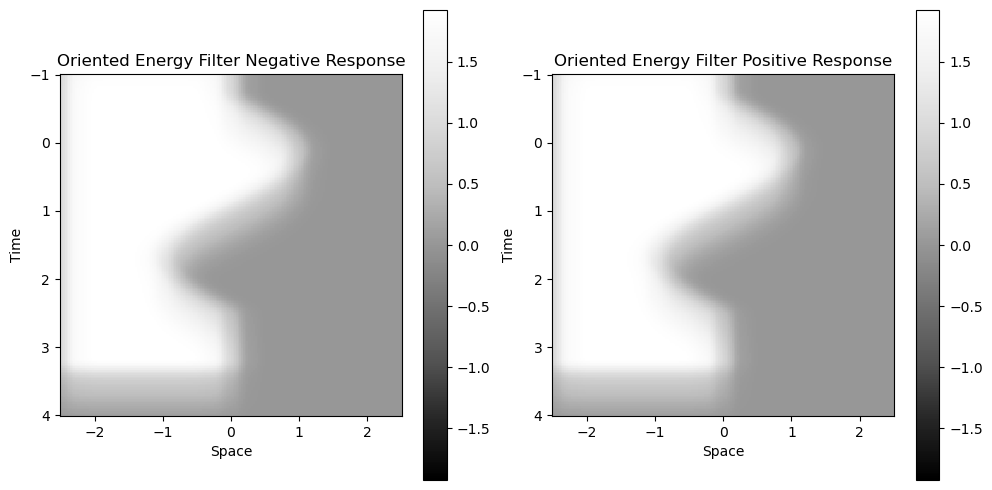

In [103]:
oriented_energy_n_resp = signal.convolve2d(stim, oriented_energy_n, mode='same')
oriented_energy_p_resp = signal.convolve2d(stim, oriented_energy_p, mode='same')

#rmin = np.min((oriented_energy_n_resp, oriented_energy_p_resp))
#rmax = np.max((oriented_energy_n_resp, oriented_energy_p_resp))
rmax = np.max(np.abs((oriented_energy_n_resp, oriented_energy_p_resp)))
rmin = -1*rmax
norm = mpl.colors.Normalize(vmin=rmin, vmax=rmax)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1, aspect=aspect_ratio_stim)
plt.pcolormesh(space_stim,time_stim,oriented_energy_n_resp.T, norm=norm, cmap='Greys_r', shading='auto')
plt.gca().invert_yaxis()
plt.xlabel('Space')
plt.ylabel('Time')
plt.colorbar()
plt.title("Oriented Energy Filter Negative Response")
plt.tight_layout()

plt.subplot(1,2,2, aspect=aspect_ratio_stim)
plt.pcolormesh(space_stim,time_stim,oriented_energy_p_resp.T, norm=norm, cmap='Greys_r', shading='auto')
plt.gca().invert_yaxis()
plt.ylabel('Time')
plt.xlabel('Space')
plt.colorbar()
plt.title("Oriented Energy Filter Positive Response")

plt.tight_layout()
plt.show()


## Opponent Energy

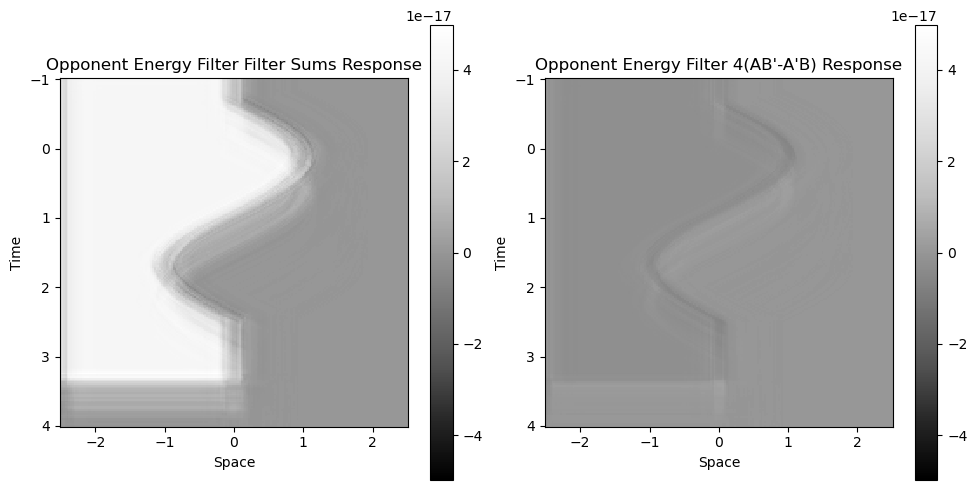

In [104]:
opponent_energy_resp = signal.convolve2d(stim, opponent_energy, mode='same')
opponent_energy_equiv_resp = signal.convolve2d(stim, opponent_energy_equiv, mode='same')

#rmin = np.min((opponent_energy_resp, opponent_energy_equiv_resp))
#rmax = np.max((opponent_energy_resp, opponent_energy_equiv_resp))
rmax = np.max(np.abs((opponent_energy_resp, opponent_energy_equiv_resp)))
rmin = -1*rmax
norm = mpl.colors.Normalize(vmin=rmin, vmax=rmax)


plt.figure(figsize=(10,5))

plt.subplot(1,2,1,aspect=aspect_ratio_stim)
plt.pcolormesh(space_stim,time_stim,opponent_energy_resp.T, norm=norm, cmap='Greys_r', shading='auto')
plt.gca().invert_yaxis()
plt.xlabel('Space')
plt.ylabel('Time')
plt.colorbar()
plt.title("Opponent Energy Filter Filter Sums Response")
plt.tight_layout()

plt.subplot(1,2,2,aspect=aspect_ratio_stim)
plt.pcolormesh(space_stim,time_stim,opponent_energy_equiv_resp.T, norm=norm, cmap='Greys_r', shading='auto')
plt.gca().invert_yaxis()
plt.xlabel('Space')
plt.ylabel('Time')
plt.colorbar()
plt.title("Opponent Energy Filter 4(AB'-A'B) Response")
plt.tight_layout()

plt.show()

### Adelson & Bergen Figure 15

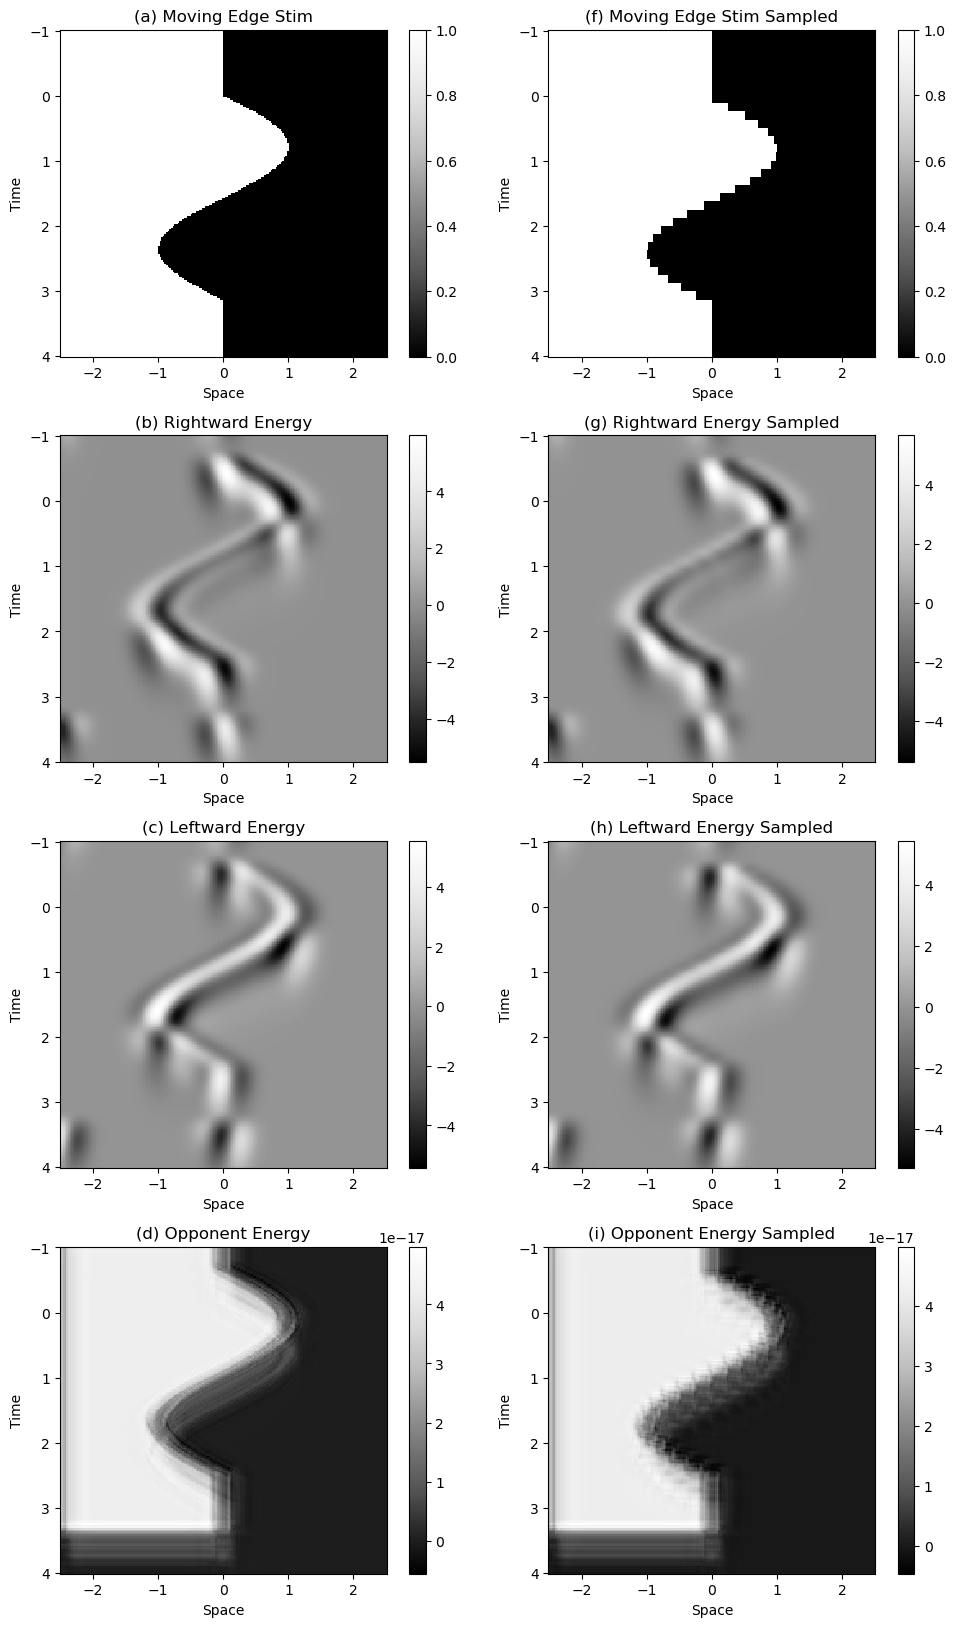

In [105]:
#create sampled version of stim
def sample_stim(stim, n_steps):
    newstim = []
    for i in range(stim.shape[1]):
        #print(i, i-int(i%n_steps))
        newstim.append(stim[:,i-int(i%n_steps)])
    #for i in range(0,stim.shape[1],n_steps):
    #    newstim.append(np.array([stim[i] for _ in range(n_steps)]))
    return(np.array(newstim).T)

sampled_stim = sample_stim(stim,n_steps=5)

#plot things
plt.figure(figsize=(10,20))

#plot stim
plt.subplot(5,2,1)
plt.pcolormesh(space_stim, time_stim, stim.T,cmap='Greys_r',shading='auto')
plt.gca().invert_yaxis()
plt.gca().set_aspect(aspect_ratio_stim)
plt.xlabel('Space')
plt.ylabel('Time')
plt.colorbar()
plt.title("(a) Moving Edge Stim")

#plot stim sampled
plt.subplot(5,2,2)
plt.pcolormesh(space_stim, time_stim, sampled_stim.T,cmap='Greys_r',shading='auto')
plt.gca().invert_yaxis()
plt.gca().set_aspect(aspect_ratio_stim)
plt.xlabel('Space')
plt.ylabel('Time')
plt.colorbar()
plt.title("(f) Moving Edge Stim Sampled")

#rightward filter response a_minus_bp_resp
ap_plus_b_resp = signal.convolve2d(stim, ap_plus_b, mode='same')
plt.subplot(5,2,3)
plt.pcolormesh(space_stim, time_stim, ap_plus_b_resp.T,cmap='Greys_r',shading='auto')
plt.gca().invert_yaxis()
plt.gca().set_aspect(aspect_ratio_stim)
plt.xlabel('Space')
plt.ylabel('Time')
plt.colorbar()
plt.title("(b) Rightward Energy")

#rightward filter response a_minus_bp_resp
ap_plus_b_resp_sampled = signal.convolve2d(sampled_stim, ap_plus_b, mode='same')
plt.subplot(5,2,4)
plt.pcolormesh(space_stim, time_stim, ap_plus_b_resp_sampled.T,cmap='Greys_r',shading='auto')
plt.gca().invert_yaxis()
plt.gca().set_aspect(aspect_ratio_stim)
plt.xlabel('Space')
plt.ylabel('Time')
plt.colorbar()
plt.title("(g) Rightward Energy Sampled")

#leftward filter response a_minus_bp_resp
ap_minus_b_resp = signal.convolve2d(stim, ap_minus_b, mode='same')
plt.subplot(5,2,5)
plt.pcolormesh(space_stim, time_stim, ap_minus_b_resp.T,cmap='Greys_r',shading='auto')
plt.gca().invert_yaxis()
plt.gca().set_aspect(aspect_ratio_stim)
plt.xlabel('Space')
plt.ylabel('Time')
plt.colorbar()
plt.title("(c) Leftward Energy")

#leftward filter response a_minus_bp_resp
ap_minus_b_resp_sampled = signal.convolve2d(sampled_stim, ap_minus_b, mode='same')
plt.subplot(5,2,6)
plt.pcolormesh(space_stim, time_stim, ap_minus_b_resp_sampled.T,cmap='Greys_r',shading='auto')
plt.gca().invert_yaxis()
plt.gca().set_aspect(aspect_ratio_stim)
plt.xlabel('Space')
plt.ylabel('Time')
plt.colorbar()
plt.title("(h) Leftward Energy Sampled")

#opponent energy filter response 
opponent_energy_resp = signal.convolve2d(stim, opponent_energy, mode='same')
plt.subplot(5,2,7)
plt.pcolormesh(space_stim, time_stim, opponent_energy_resp.T,cmap='Greys_r',shading='auto')
plt.gca().invert_yaxis()
plt.gca().set_aspect(aspect_ratio_stim)
plt.xlabel('Space')
plt.ylabel('Time')
plt.colorbar()
plt.title("(d) Opponent Energy")

#opponent energy filter response 
opponent_energy_resp_sampled = signal.convolve2d(sampled_stim, opponent_energy, mode='same')
plt.subplot(5,2,8)
plt.pcolormesh(space_stim, time_stim, opponent_energy_resp_sampled.T,cmap='Greys_r',shading='auto')
plt.gca().invert_yaxis()
plt.gca().set_aspect(aspect_ratio_stim)
plt.xlabel('Space')
plt.ylabel('Time')
plt.colorbar()
plt.title("(i) Opponent Energy Sampled")


plt.tight_layout()


### How do these filters appear in spatial/frequency space? 

Extending the paper, we wish to understand how to use these filters to create a scale-able pyramid. Our temporal filers have a temporal scale parameter, k. The spatial filers are also easily scale-able.    

First, let's explore how these filters appear in spatiotmeporal energy space, figure 11.

Text(0.5, 1.0, "A'-B Amplitude Frequency Space")

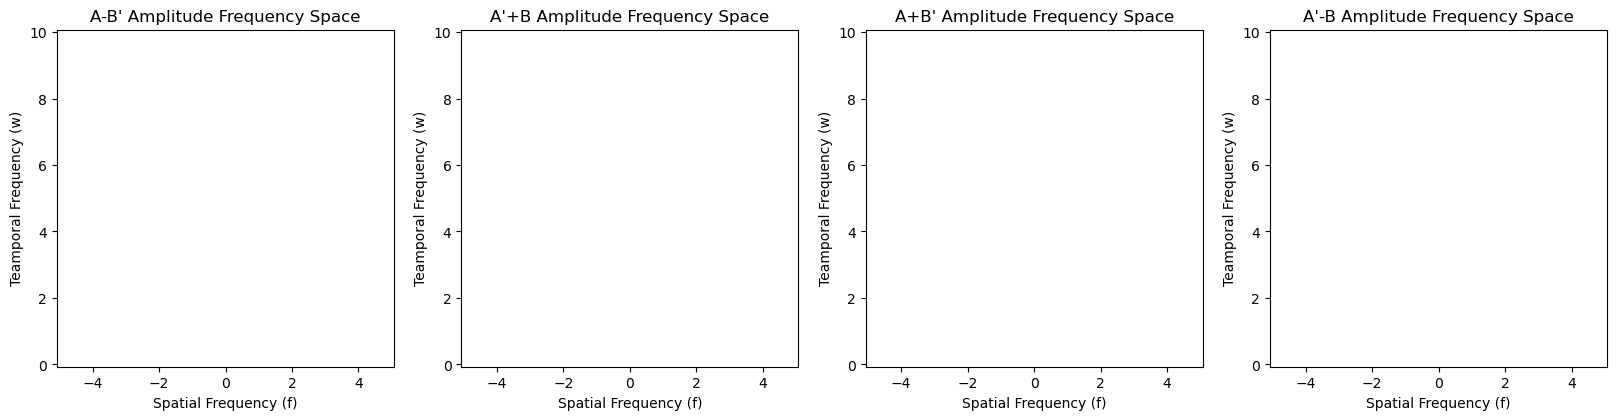

In [108]:
a_minus_bp_amp = np.abs(np.fft.fftshift(np.fft.fft2(a_minus_bp)))
ap_plus_b_amp = np.abs(np.fft.fftshift(np.fft.fft2(ap_plus_b)))
a_plus_bp_amp = np.abs(np.fft.fftshift(np.fft.fft2(a_plus_bp)))
ap_minus_b_amp = np.abs(np.fft.fftshift(np.fft.fft2(ap_minus_b)))


plt.figure(figsize=(20,5))

plt.subplot(1,4,1, aspect=aspect_ratio)
plt.pcolormesh(space,times,a_minus_bp_amp, norm=norm, shading='auto',cmap='Greys_r')
plt.xlabel('Spatial Frequency (f)')
plt.ylabel('Teamporal Frequency (w)')
#plt.colorbar()
plt.title(f"A-B' Amplitude Frequency Space")

plt.subplot(1,4,2, aspect=aspect_ratio)
plt.pcolormesh(space,times,ap_plus_b_amp, norm=norm, shading='auto',cmap='Greys_r')
plt.xlabel('Spatial Frequency (f)')
plt.ylabel('Teamporal Frequency (w)')
#plt.colorbar()
plt.title(f"A'+B Amplitude Frequency Space")

plt.subplot(1,4,3, aspect=aspect_ratio)
plt.pcolormesh(space,times,a_plus_bp_amp, norm=norm, shading='auto',cmap='Greys_r')
plt.xlabel('Spatial Frequency (f)')
plt.ylabel('Teamporal Frequency (w)')
#plt.colorbar()
plt.title(f"A+B' Amplitude Frequency Space")

plt.subplot(1,4,4, aspect=aspect_ratio)
plt.pcolormesh(space,times,ap_minus_b_amp, norm=norm, shading='auto',cmap='Greys_r')
plt.xlabel('Spatial Frequency (f)')
plt.ylabel('Teamporal Frequency (w)')
#plt.colorbar()
plt.title(f"A'-B Amplitude Frequency Space")